<a href="https://colab.research.google.com/github/benasphy/k-means/blob/main/Elbow_method_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

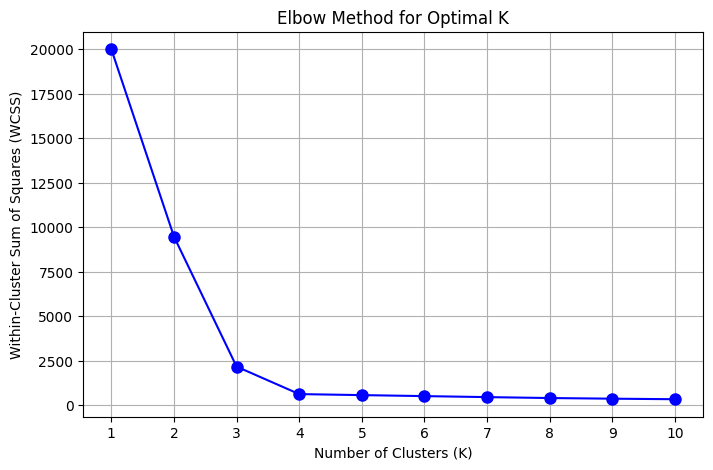

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic dataset
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.05, random_state=42)

# Range of K values to test
k_values = range(1, 11)

# Store WCSS for each K
wcss = []

# Apply K-Means clustering for each K
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # WCSS (Sum of squared distances)

# Plot the Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='-', color='b', markersize=8)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_values)
plt.grid()
plt.show()


Optimal K: 3


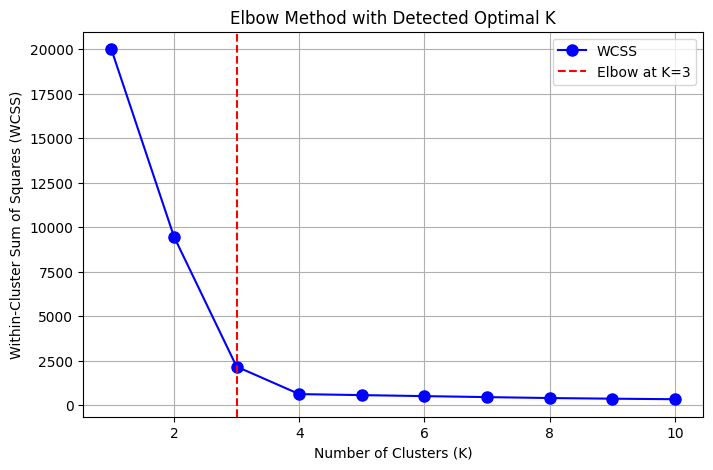

In [4]:
from kneed import KneeLocator

# Find the elbow point
knee = KneeLocator(k_values, wcss, curve="convex", direction="decreasing")

print(f"Optimal K: {knee.elbow}")

# Plot with the detected elbow point
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='-', color='b', markersize=8, label="WCSS")
plt.axvline(x=knee.elbow, color='r', linestyle='--', label=f'Elbow at K={knee.elbow}')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method with Detected Optimal K')
plt.legend()
plt.grid()
plt.show()


In [3]:
!pip install kneed